# Final Project Design Writeup 

### Project Problem and Hypothesis
Medical practices handle a large multitude of documents for each of their patients (many coming from different sources) that often require manual work of administrators to classify, compile and file. My friend Brian is developing a startup called WaitingRoomApp, an app that helps automate several aspects of the waiting room in medical practices (e.g., the elimination of the clipboard) and he already has several medical practices as customers. This project would help with the task of automating the process of classifying the documents that the practices receive, and could eventually serve as one of WaitingRoomApp's product offerings. As a machine learning problem, this would be a multi-class classification problem (discrete outcomes). If successful for several multiple types of documents, this project would save WaitingRoomApp's customers a considerable amount of time, money and staffing resources.

### Datasets
Data was obtained by querying medical document pdfs using the Microsoft Bing Web Search API - we chose this approach because in order for the model to be generalizable to several different medical practices, we need to train the model using documents from a variety of sources. We queried pdfs of 3 types of medical documents - medical release forms, informed consent forms, and patient intake forms - as well as a "catch all" bucket for other medical forms that do not fit those 3 types. I will use the data at both the document-level (some have multiple pages) and page-level. The data dictionary for the page-level data is below:

Variable | Description | Type of Variable
---| ---| ---
filename | name of the document file (url) | object (string)
pagenumber | page number the text is on | integer (continuous)
text | text on the page | object (string) 
pdf_version | pdf version | float (continuous)
info | info about the pdf creation (date, PDF version..) and author | object (string) 
metadata | other pdf metadata | object (string) 
class | Type of document (outcome variable): 1=release form, 2=consent form, 3=patient intake form, 4=other medical form | categorical 

The data dictionary for the document-level data is the same except there is no 'pagenumber' column, the 'text' column contains all of the text in the document, and each row is a unique document. 

We plan to start by using just the 'text' variable to predict the outcome for both training sets.

### Domain knowledge
I do not have any experience in the field of medical software/technologies, but I wanted to apply my machine learning knowledge to a new domain as well as to a problem whose solution would be immediately practical.
There have certainly been ongoing research efforts in the area of medical document classification. One paper I found implemented medical document classification using domain ontology (grouping terms into 'Concepts' by using the Medical Subject Headings thesaurus) as well as the usual bag of words representation using stems. Their results (F1 scores) from implementing KNN and decision trees are displayed below, and these could serve as accuracy benchmarks. In the 'Concepts + Hyperonym' column, the frequencies in which each concept's hyponyms appear are added to the concept's frequency (captures the relations between concepts).


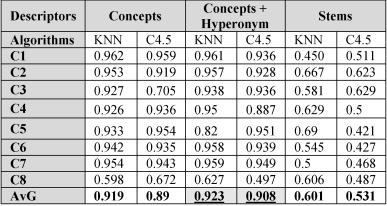

In [2]:
from IPython.display import Image
Image(filename='prevresults.png')
#source: http://www.iajet.org/iajet_files/vol.2/no.4/Medical%20Documents%20Classification%20Based%20on%20the%20Domain%20Ontology%20MeSH.pdf

For the specific documents we collected, I plan to start by using a bag of words representation and implementing Multinomial Naive Bayes, then SVM (saw another paper where SVM was implemented for text classification) and if possible, Neural Networks for text classification and see how the results compare. A next phase of the project could implement _image classification_ using Convolutional Neural Networks with the document page inputs as _images_ instead of text from pdfs.

### Project Concerns
* My primary concern about the project is that implementing *just* a text classifier might not be sufficient for all potential use cases; for instance, medical practices could receive faxes or photocopies of documents that are rotated and the text might not be extractable. This relates to my other concern about what the future input will look like and how we will be able to parse the text correctly and efficiently.
* Assumptions and Caveats: Since we are pulling a sample pdfs using a search engine, these certainly may not be representative of all types of documents medical practices receive. Furthermore, we are only training the model to detect 3 categories of documents with the hope that it could eventually be applied to detect more types.
* Risks to the project: As mentioned, the model may not generalize well in practice, and we may not obtain good enough accuracy by using just a text classifier (with a bag of words representation) on our sample data. Also, potential duplication and low variability between the documents we obtained poses a risk.

### Outcomes
* The output of the project will be a number from 1 to 4 (see data dictionary above) representing the predicted document class for each page (for the page-level data) and document (for the document level data). I plan to build a model for both training set types both to compare the results and also because we aren't completely sure of the target audience's needs/priorities. The target audience would likely expect the input document or page files themselves to be automatically moved into folders representing each predicted class - this would be a feature of the end product. 
* The model does not need to be complicated, but needs to be sufficiently accurate and generalize well to new data (accuracy of 80%+ to start would be ideal). Another component of success would be the ability to extend the model to detect more than 3 classes.
* If for some reason the model turns out to be a bust, we will start by consider alternate methods for collecting training data (as an addition or replacement to the current dataset) such as asking actual WaitingRoomApp customers for documents (there may be privacy issues here before we can show a proven product) or explanding the "catch-all" bucket by randomly sampling from a pool of common medical document terms to form "fake/noise documents" (just a hypothesis - this could make the model more powerful/generalizable).
